## Исследование данных о российском кинопрокате



**Описание данных
Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.**
* title — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма.
Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.
Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
* puNumber — номер прокатного удостоверения;
* box_office — сборы в рублях.

* Шаг 2. Предобработка данных
Проверьте типы данных в датафрейме и преобразуйте там, где это необходимо.
Изучите пропуски в датафрейме. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать.
Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.
Изучите столбцы, которые содержат категориальные значения:
Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
Исправьте проблемные значения в поле type.
Изучите столбцы, которые хранят количественные значения. Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?
Добавьте новые столбцы:
Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма;
Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно;
Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.
* Шаг 3. Проведите исследовательский анализ данных
Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.
Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?
С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.
Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.
* Шаг 4. Исследуйте фильмы, которые получили государственную поддержку
На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/datasets/mkrf_movies.csv')
df1 = pd.read_csv('/datasets/mkrf_shows.csv')
df.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [3]:
# проверяем типы данных в каждом столбце датафреймов
print(df.dtypes,'\n')
print(df1.dtypes)

title                     object
puNumber                  object
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
dtype: object 

puNumber        int64
box_office    float64
dtype: object


In [4]:
# Объединять датафреймы будем по столбцу "puNumber", но видим что тип данных в этих столбцах разный
# потому приведем столбец в первом фрейме к типу "int64". Так как некоторые строки не имеют номера
# прокатного удостоверения и эти пропуски мы заполним -1, что бы было возможно произвести
# преобразование к типу  "int64"
df['puNumber'] = pd.to_numeric(df['puNumber'], errors='coerce')
df['puNumber'] =  df['puNumber'].fillna(-1).astype(np.int64)

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [5]:
# Объединяем фреймы в один датафрейм по столбцу 'puNumber' и указываем how='left' что бы
# сохранились все строки из фрейма df
df = df.merge(df1, on='puNumber', how='left')
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [6]:
# Так же преобразуем даты премьеры фильма в тип даты
df['show_start_date'] = pd.to_datetime(df['show_start_date'])
# И рейтинг в числовой формат
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int64
show_start_date          7486 non-null datetime64[ns, UTC]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6490 non-null float64
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(9)
memory usage: 994.2+ KB


#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [8]:
# Проверим пропуски в датафрейме
df.isna().sum()
# Пропуски в "puNumber" были заполнены -1
# Видим что больше всего пропусков в значениях связаных с бюджетом и финансированием фильмов, так как мы не знаем бюджета,
# что видимо скрыли создатели фильма, заполнять их не будем, рейтинг тоже не будем заменять на медиану, либо нули, попробуем оставить все как есть

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

In [27]:
df.isna().mean().reset_index()

,index,0
0,title,0.000000
1,puNumber,0.000000
2,show_start_date,0.000000
3,type,0.000000
4,film_studio,0.002404
5,production_country,0.000267
6,director,0.001202
7,producer,0.075875
8,age_restriction,0.000000
9,refundable_support,0.955651


#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [10]:
# проверка на наличие дубликатов названий фильмов
# Как видим ниже в данных дублируются 558 фильмов возможно это связано с методом получения данных
# при котором данные брались с разных источников в которых была разная информация
counts = df.groupby('title').size()
df2 = pd.DataFrame(counts, columns = ['size'])
print(df2[df2['size']>1])


                                   size
title                                  
100 миллионов евро                    2
127 часов                             2
13 часов: Тайные солдаты Бенгази      2
13-й район: Кирпичные особняки        2
13.                                   2
...                                 ...
Эскадрилья "Лафайет"                  2
Этим утром в Нью-Йорке                2
Я ненавижу день святого Валентина     2
Я, снова я и мама                     2
Ян Антонышев                          2

[558 rows x 1 columns]


In [11]:
# Возьмем для примера фильм под названием '127 часов'
# Ниже видим что оп дублируется в датафрейме два раза, но номер прокатного удостоверения и дата выхода
# отличаются в обоих случаях
df.loc[df['title'] == '127 часов']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4852,127 часов,121000811,2011-01-27 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
5058,127 часов,221069011,2011-05-18 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN


#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [12]:
# Проверим какие значения есть в столбце 'type' тип фильма
# видим что есть лишние пробелы вначале некоторых строк
# убираем их при помощи функции str.strip()
counts = df.groupby('type').size()
df2 = pd.DataFrame(counts, columns = ['size'])
print(df2)

df['type'] = df['type'].str.strip() 

                            size
type                            
 Анимационный                  1
 Художественный             1389
Анимационный                 828
Документальный               288
Музыкально-развлекательный     1
Научно-популярный             53
Прочие                       406
Художественный              4520


In [13]:
df['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

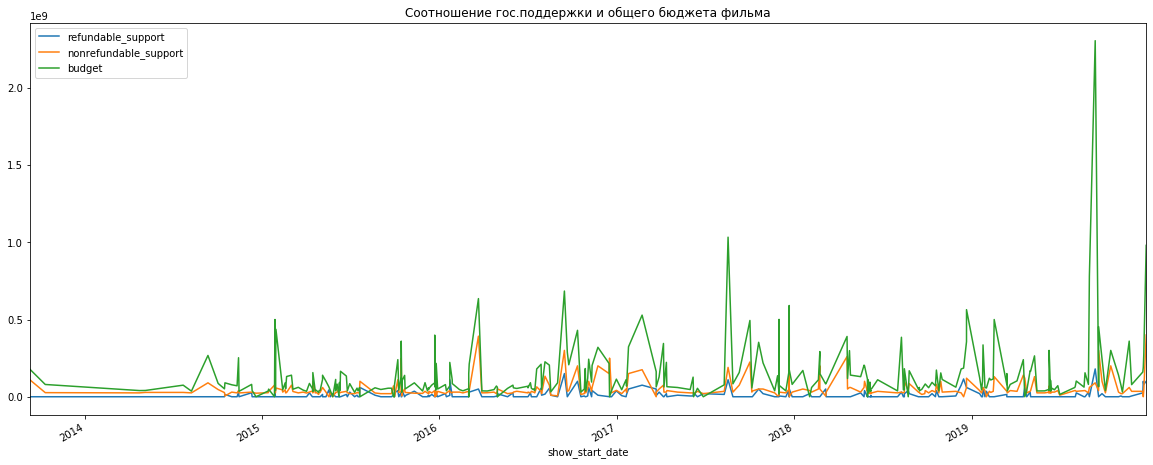

In [28]:
# Построим график для количественных значений
# с графика видно что "budget" прямо пропорционально отностится к "refundable_support" и "nonrefundable_support"
# причем объём невозвратных средств государственной поддержки больше чем объём возвратных средств

df.dropna().plot(x="show_start_date",
                 y=["refundable_support", "nonrefundable_support", "budget"],
                 figsize=(20,8),
                 title='Соотношение гос.поддержки и общего бюджета фильма')
plt.show()

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [15]:
# Создадим новый столбец с информацией о годе проката.
df['show_year'] = df['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [16]:
# Создадим еще два столбца: с именем и фамилией главного режиссёра и основным жанром фильма.
# В столбцы войдут первые значения из списка режиссёров и жанров соответственно.
# Чтобы создать такие столбцы напишем собственную функцию.
def first_item(string):
    if not pd.isna(string):
        return string.split(',')[0]
    return string

In [17]:
# Применим функцию к двум столбцам.
df['main_director'] = df['director'].apply(first_item)
df['main_genres'] = df['genres'].apply(first_item)

In [18]:
df['director'].str.split(',').str[0]

0           Кевин Костнер
1               Е.Матвеев
2       Тимур Бекмамбетов
3       Тимур Бекмамбетов
4       Тимур Бекмамбетов
              ...        
7481          Фил Грабски
7482           Ник Пауэлл
7483     Чарльз Е.Бастьен
7484             А.Беляев
7485             И.Трусов
Name: director, Length: 7486, dtype: object

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [19]:
# Так же создадим столбец и рассчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.
df['percent_of_support'] = ((df["refundable_support"] + df["nonrefundable_support"]) / df["budget"])*100
df = df.round({'percent_of_support':1})
df.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,main_director,main_genres,percent_of_support
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN,2016,В.Абдрашитов,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0,2013,В.Меньшов,мелодрама,NaN
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,2014,Джон Туртурро,мюзикл,NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN,2016,Эрик Беснард,комедия,NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN,2014,В.Титов,мелодрама,NaN


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

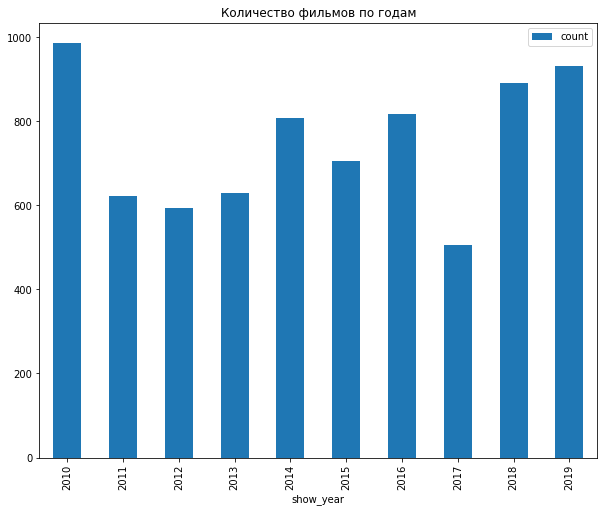

In [30]:
# Построим график на котором отобразим количество фильмов в прокате по каждому году
counts = df.groupby('show_year').size()
df2 = pd.DataFrame(counts, columns = ['count'])
df2.plot(figsize=(10,8), kind="bar", title='Количество фильмов по годам')
plt.show()

In [21]:
# Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.
print(round(df['box_office'].count()/len(df)*100,2),'%')

42.19 %


- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

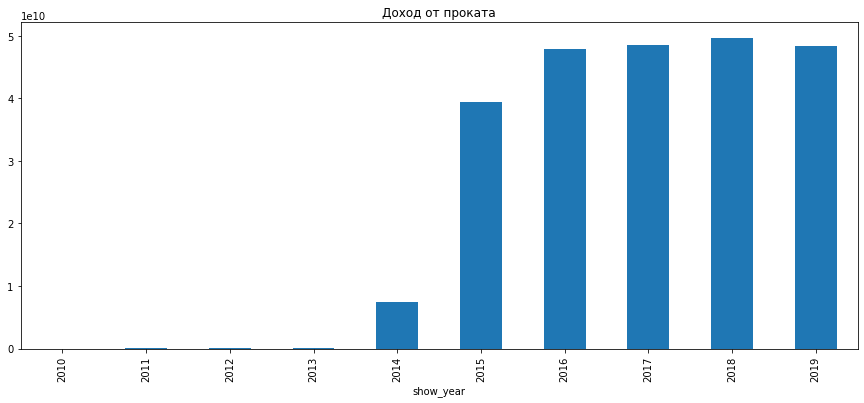

In [40]:
# Динамика проката по годам
df_box_office = df.groupby('show_year')['box_office'].sum()
df_box_office.plot(figsize=(15,6), kind="bar", title='Доход от проката')
plt.show()
# Из диаграмы ниже видно что максимальная сумма сборов была в 2018 году,
# а минимальная в 2010

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [23]:
# С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.
df_mean_med = df.pivot_table('box_office', 'show_year', aggfunc={'box_office':['median', 'mean']})
df_mean_med

,mean,median
show_year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000
2018,1.045651e+08,8891102.210


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

age_restriction
«0+» - для любой зрительской аудитории    8.090774e+08
«18+» - запрещено для детей               4.075962e+10
«6+» - для детей старше 6 лет             5.579861e+10
«12+» - для детей старше 12 лет           6.061945e+10
«16+» - для детей старше 16 лет           7.603473e+10
Name: box_office, dtype: float64


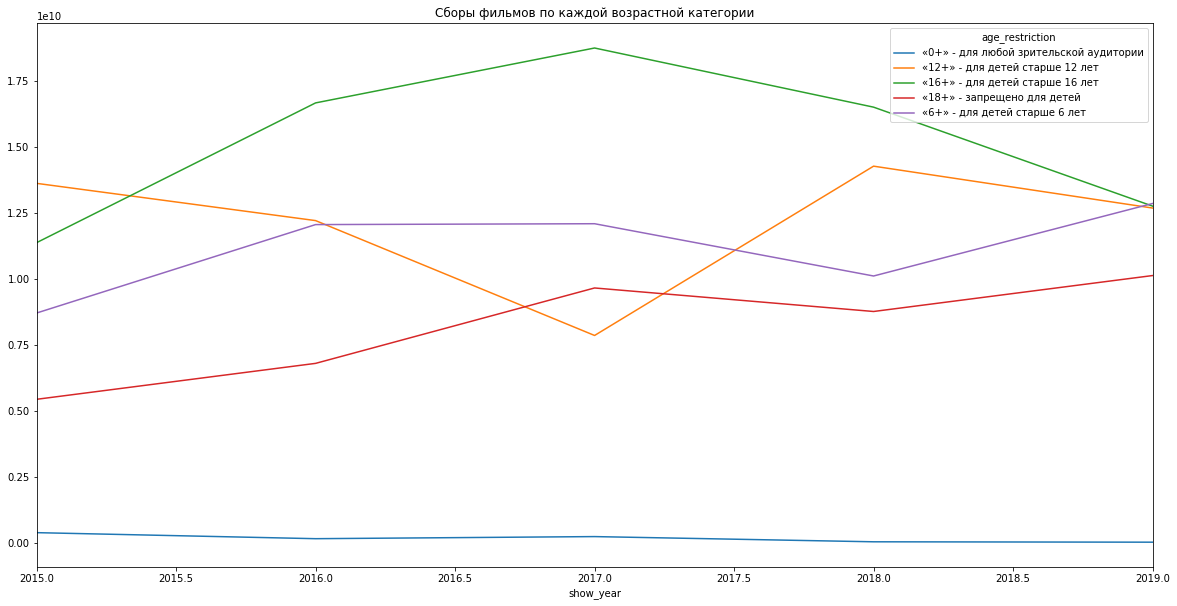

In [32]:
# Выберем фильмы год проката которых начинается с 2015 и посмотрим на общие сборы фильмов
# в зависимости от возрастных ограничений. Как видим больше собрали фильмы для детей старше 16 лет
# а меньше всего  для любой зрительской аудитории
print(df.loc[df['show_year'] >= 2015].groupby('age_restriction')['box_office'].sum().sort_values())

# Проверим меняется ли эта тенденция в зависимомти от года
# Для этого создадим сводную таблицу и построим график сборов по каждому году для каждой категории фильмов
# возрастных ограничений
# Как видно из графика в 2017 году фильмы для детей старше 12 лет получили очень низкие сборы, но в целом
# тенденция по годам не изменяется
df_age = df.loc[df['show_year'] >= 2015].pivot_table('box_office', index='show_year', columns='age_restriction', aggfunc=sum)
df_age.plot(figsize=(20,10), title='Сборы фильмов по каждой возрастной категории')
plt.show()

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

           nonrefundable_support  refundable_support
show_year                                           
2013                1.343479e+08                 0.0
2014                5.010023e+08          71000000.0
2017                2.464625e+09         719346881.0
2018                2.784969e+09         662000000.0
2015                3.019088e+09         637153119.0
2016                3.381655e+09         921500000.0
2019                3.976000e+09         928000000.0


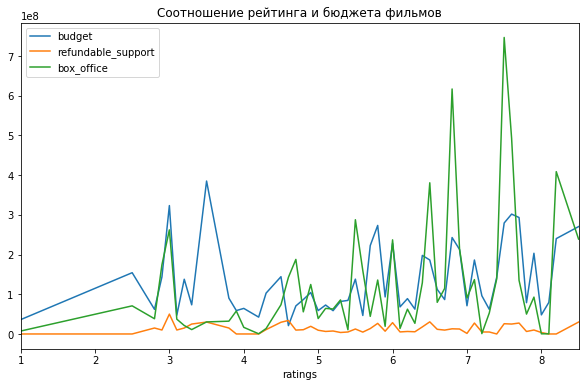

In [39]:
# Посмотрим на государственную поддержку фильмов по годам
# как видим что поддержка увеличивается из года в год, но в 2017-18 годах она немного снизилась
print(df.loc[df['nonrefundable_support'].notna()].groupby('show_year')[['nonrefundable_support', 'refundable_support']].sum().sort_values(by='nonrefundable_support'))

# Так же построим график зависимости рейтинга фильмов от среднего объема возвратных и
# не возвратных средств. Из графика видно что фильмы хорошо окупаются и чем больше
# поддержка тем выше рейтинг фильма

df_reating = df.loc[df['refundable_support'].notna()][['ratings', 'budget', 'refundable_support', 'box_office']]
df_reating.groupby('ratings').mean().plot(figsize=(10,6), title='Соотношение рейтинга и бюджета фильмов')
plt.show()


### Шаг 5. Напишите общий вывод

По итогам можно сделать главный вывод, что чем больше бюджет, тем выше рейтинг и значит больше сборы, но бывают и обратные примеры. После 2014 года объём невозвратных средств государственной поддержки резко снизился, что связано с кризисом, после 2015 понемногу поддержка государства увеличивается. Больше всего приносят прибыли фильмы с ограничением 16+.